In [1]:
!pip install geopandas folium

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile (adjust the path if needed)
tanzania = gpd.read_file("TANZANIA_2022PHC_WARDS_SHAPEFILES.shp")


In [78]:
print(tanzania.columns)

Index(['OBJECTID_1', 'OBJECTID', 'reg_code', 'reg_name', 'dist_code',
       'dist_name', 'counc_code', 'counc_name', 'const_code', 'const_name',
       'div_code', 'div_name', 'ward_code', 'ward_name', 'Shape_Leng',
       'Shape_Le_1', 'Shape_Area', 'geometry'],
      dtype='object')


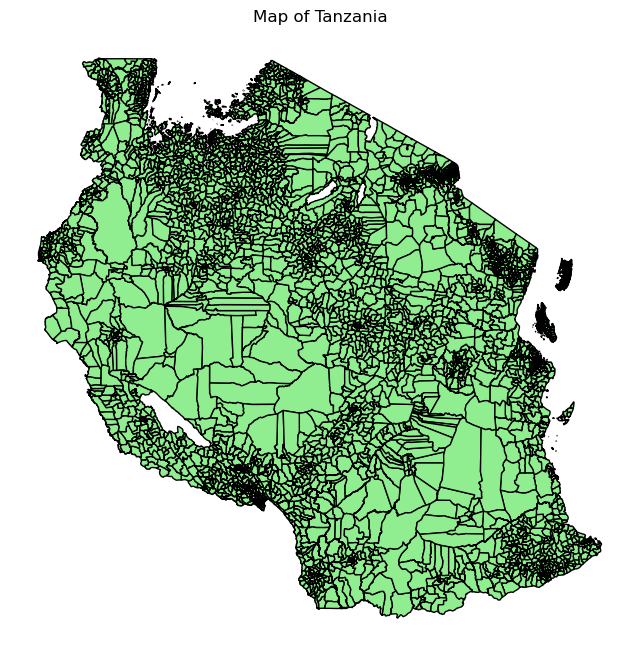

In [79]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))
tanzania.plot(ax=ax, color='lightgreen', edgecolor='black')
ax.set_title('Map of Tanzania')
plt.axis('off')
plt.show()

In [80]:
regions = tanzania.dissolve(by='reg_name').reset_index()

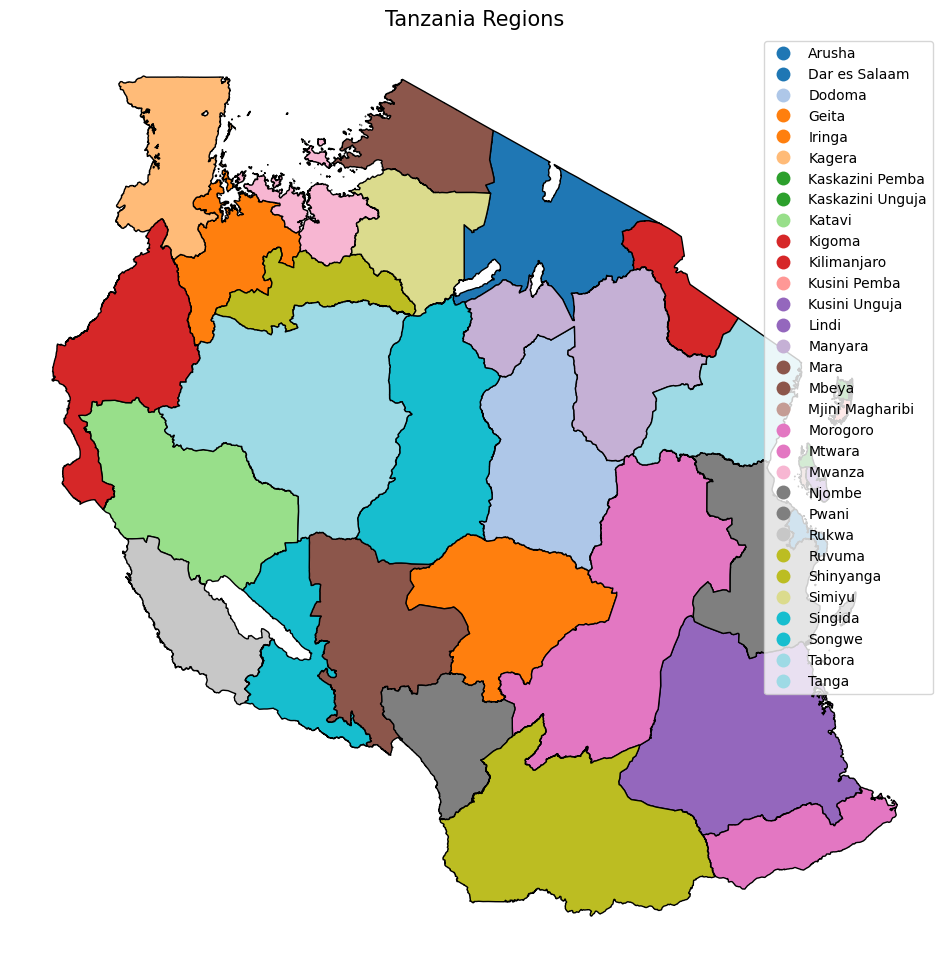

In [81]:
fig, ax = plt.subplots(figsize=(12, 12))
regions.plot(
    ax=ax,
    column='reg_name',      # use this column for colors
    cmap='tab20',
    legend=True,
    edgecolor='black'
)
ax.set_title('Tanzania Regions', fontsize=15)
ax.axis('off')
plt.show()

In [39]:
import pandas as pd

food_insecurity_data = pd.read_csv("acute-food-insecurity-analysis-by-region.csv")

In [84]:
districts = tanzania.dissolve(by='dist_name').reset_index()  # as before

# Merge malnutrition data with shapefile by region name
merged = districts.merge(food_insecurity_data, on='dist_name')

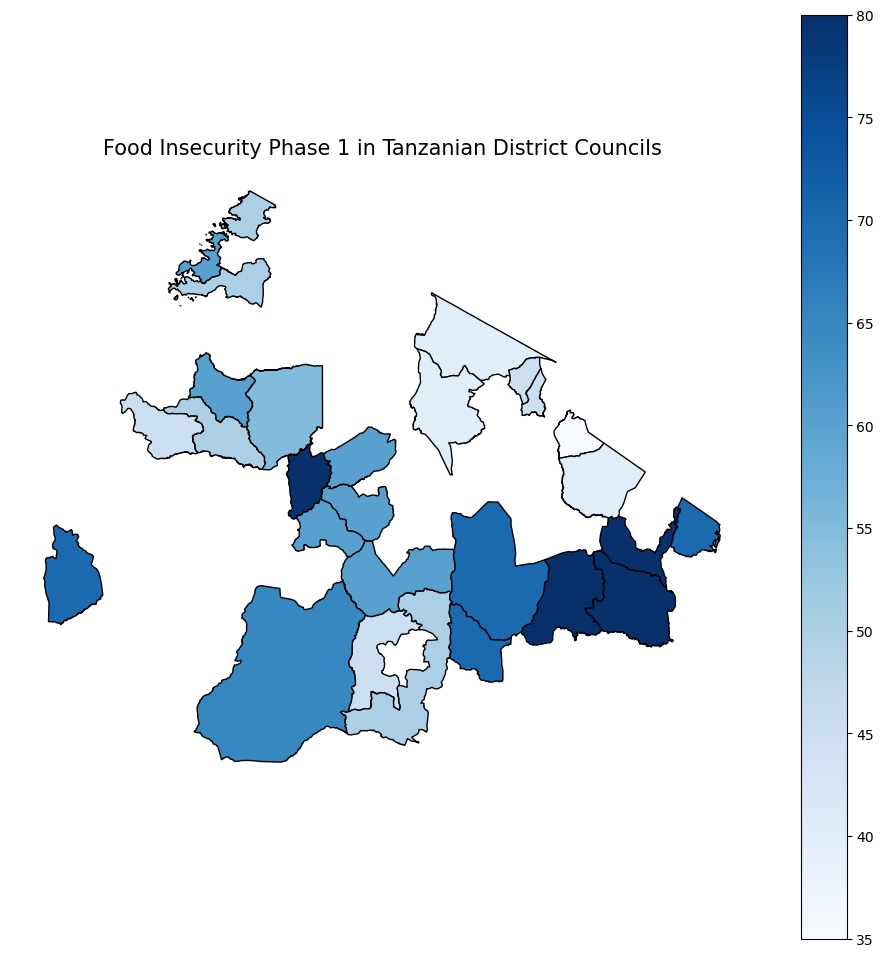

In [90]:
fig, ax = plt.subplots(figsize=(12, 12))
merged.plot(
    column='Phase 1 (%)',
    cmap='Blues',
    legend=True,
    edgecolor='black',
    ax=ax
)
ax.set_title('Food Insecurity Phase 1 in Tanzanian District Councils', fontsize=15)
ax.axis('off')
plt.show()

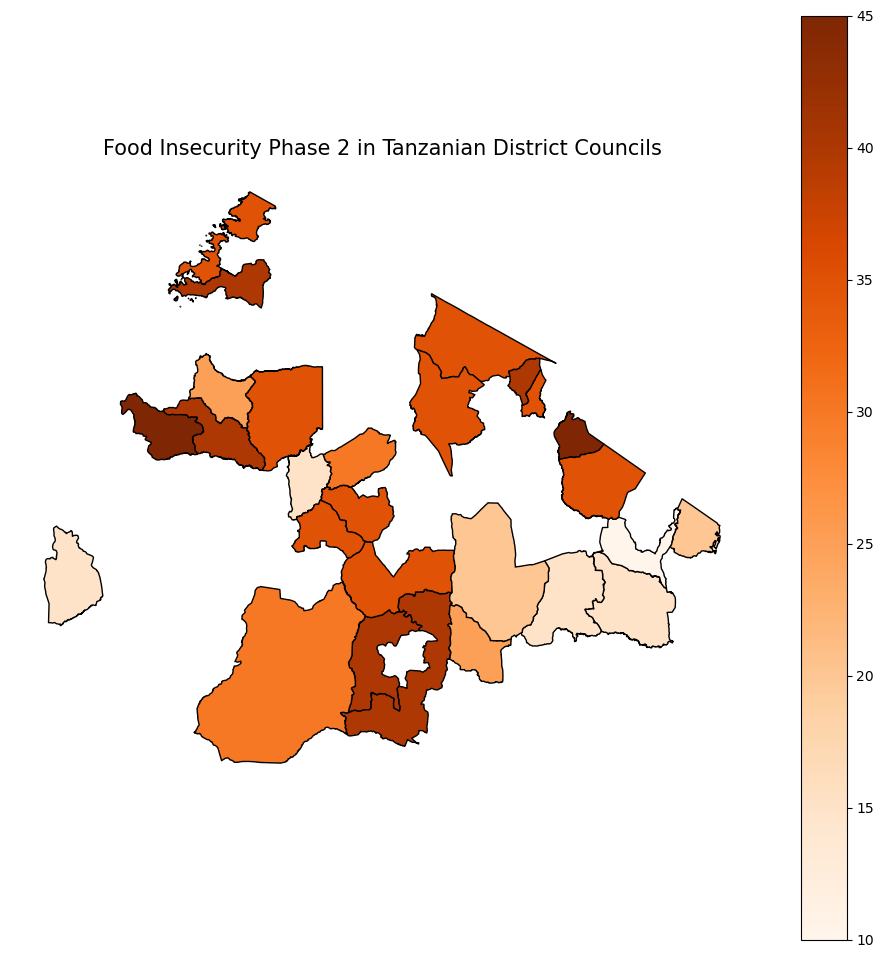

In [91]:
fig, ax = plt.subplots(figsize=(12, 12))
merged.plot(
    column='Phase 2 (%)',
    cmap='Oranges',
    legend=True,
    edgecolor='black',
    ax=ax
)
ax.set_title('Food Insecurity Phase 2 in Tanzanian District Councils', fontsize=15)
ax.axis('off')
plt.show()

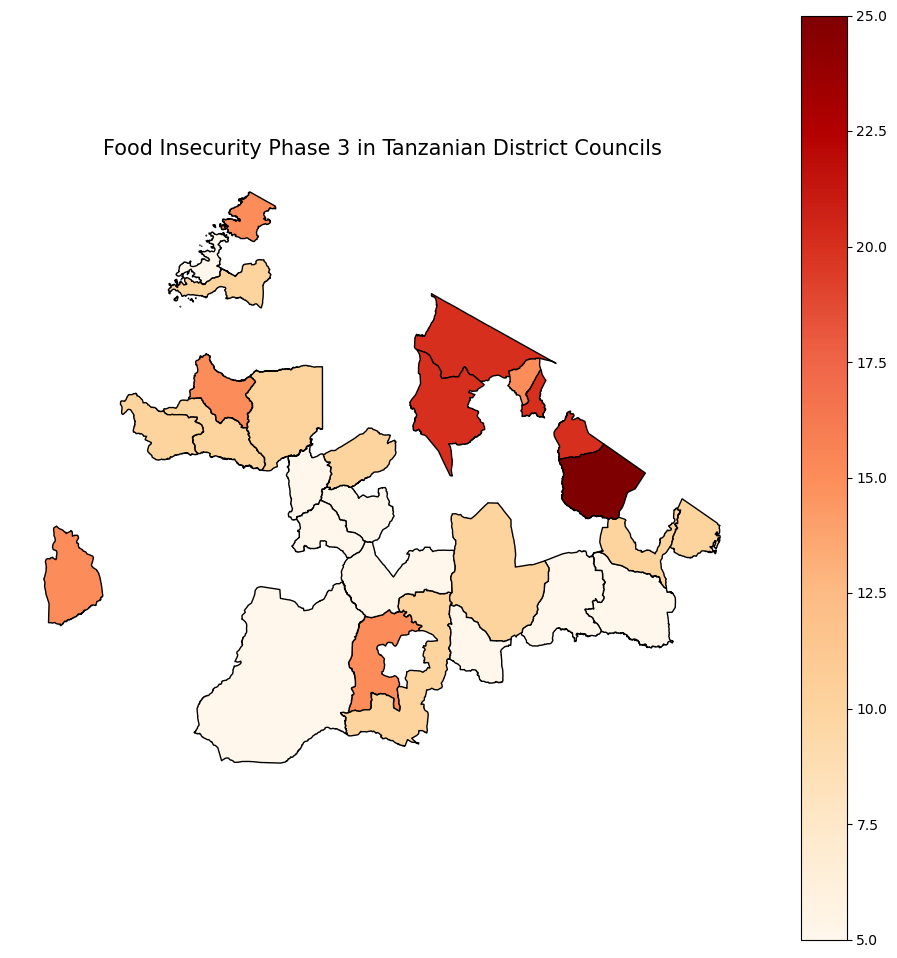

In [92]:
fig, ax = plt.subplots(figsize=(12, 12))
merged.plot(
    column= 'Phase 3 (%)',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    ax=ax
)
ax.set_title('Food Insecurity Phase 3 in Tanzanian District Councils', fontsize=15)
ax.axis('off')
plt.show()

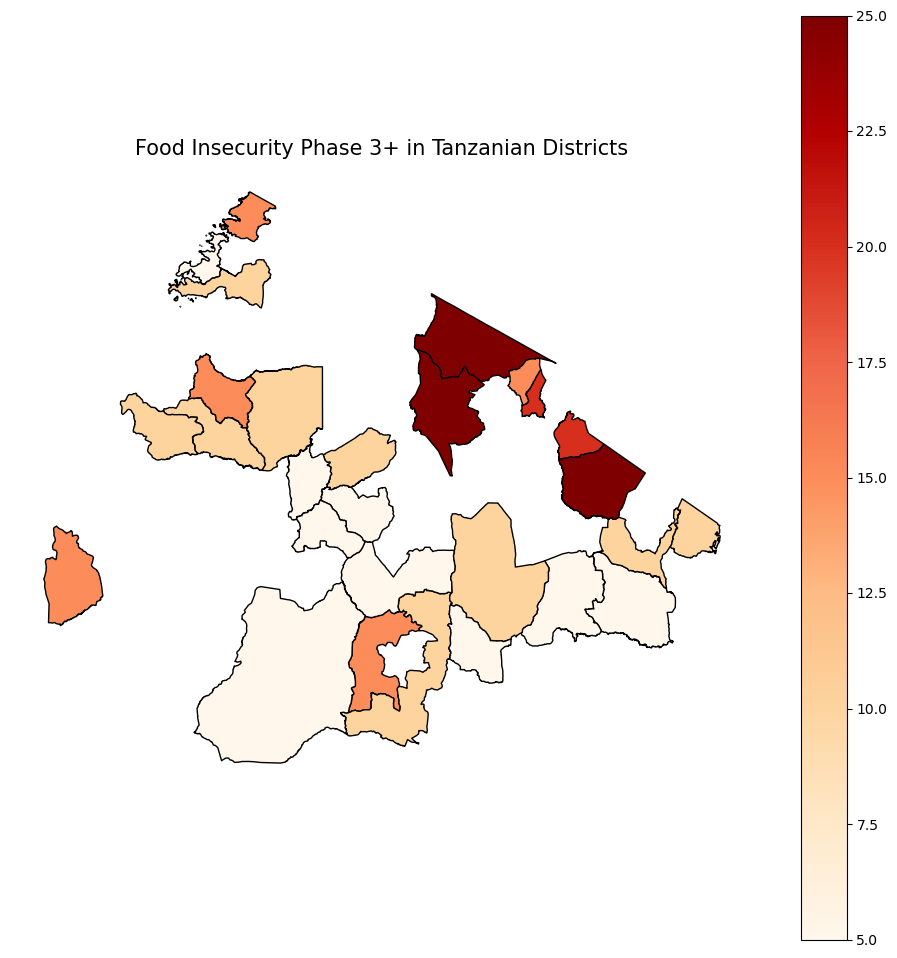

In [56]:
districts = tanzania.dissolve(by='dist_name').reset_index()  # as before
fig, ax = plt.subplots(figsize=(12, 12))
merged.plot(
    column='Phase 3+ (%)',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    ax=ax
)
ax.set_title('Food Insecurity Phase 3+ in Tanzanian Districts', fontsize=15)
ax.axis('off')
plt.show()